In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
eyes_fascade = cv2.CascadeClassifier('./third-party/frontalEyes35x16.xml')
nose_fascade = cv2.CascadeClassifier('./third-party/Nose18x15.xml')

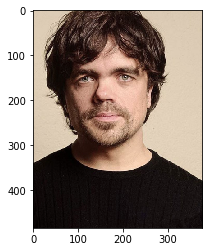

In [3]:
img = cv2.imread('./data/Before.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

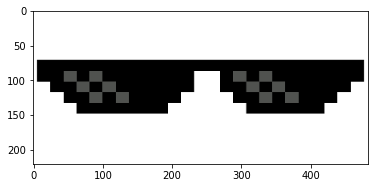

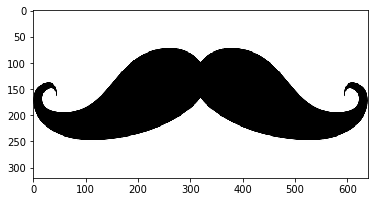

In [4]:
glasses = cv2.imread("glasses.png", cv2.IMREAD_UNCHANGED)
glasses = cv2.cvtColor(glasses, cv2.COLOR_BGRA2RGBA)
plt.imshow(glasses)
plt.show()

mustache = cv2.imread("mustache.png", cv2.IMREAD_UNCHANGED)
mustache = cv2.cvtColor(mustache, cv2.COLOR_BGRA2RGBA)
plt.imshow(mustache)
plt.show()

In [5]:
eyes = eyes_fascade.detectMultiScale(img, 1.2, 5)
eyes

array([[ 84, 111, 159,  73]], dtype=int32)

In [6]:
x1,y1,w1,h1 = eyes[0]

In [7]:
glasses = cv2.resize(glasses, (w1,h1))

In [8]:
nose = nose_fascade.detectMultiScale(img, 1.5, 5)
nose

array([[125, 167,  61,  51]], dtype=int32)

In [9]:
x2,y2,w2,h2 = nose[0]

In [10]:
y2 += 30

In [11]:
mustache = cv2.resize(mustache, (w2+15,h2))

In [12]:
for i in range(glasses.shape[0]):
    for j in range(glasses.shape[1]):
        if(glasses[i,j,3]>0):
            img[y1+i,x1+j,:]=glasses[i,j,:-1]

In [13]:
for i in range(mustache.shape[0]):
    for j in range(mustache.shape[1]):
        if(mustache[i,j,3]>0):
            img[y2+i,x2+j,:]=mustache[i,j,:-1]

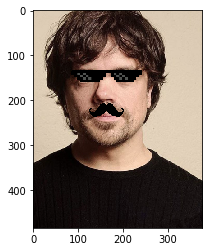

In [14]:
plt.imshow(img)

In [15]:
img.shape

(485, 377, 3)

In [16]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite("out.jpg", img)

True

In [17]:
img = img.reshape((-1,3))

In [18]:
df = pd.DataFrame(img, columns=["Channel 1","Channel 2", "Channel 3"]).to_csv("new_pred.csv", index=False)

In [19]:
# Live Webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    if ret == False:
        continue
        
    glasses = cv2.imread("glasses.png", cv2.IMREAD_UNCHANGED)
    glasses = cv2.cvtColor(glasses, cv2.COLOR_BGRA2RGBA)

    mustache = cv2.imread("mustache.png", cv2.IMREAD_UNCHANGED)
    mustache = cv2.cvtColor(mustache, cv2.COLOR_BGRA2RGBA)
        
    eyes = eyes_fascade.detectMultiScale(frame, 1.2, 5)
    nose = nose_fascade.detectMultiScale(frame, 1.5, 5)
    
    for (x,y,w,h) in eyes:
        glasses = cv2.resize(glasses, (w,h))
        
        for i in range(glasses.shape[0]):
            for j in range(glasses.shape[1]):
                if glasses[i,j,3]>0:
                    frame[y+i,x+j,:] = glasses[i,j,:-1]
                    
    for (x,y,w,h) in nose:
        mustache = cv2.resize(mustache, (w,h))
        y += 20
        
        for i in range(mustache.shape[0]):
            for j in range(mustache.shape[1]):
                if mustache[i,j,3]>0:
                    frame[y+i,x+j,:] = mustache[i,j,:-1]
    
    cv2.imshow("Snapchat Filter", frame)
    
    key_pressed = cv2.waitKey(1) & 0xFF
    if key_pressed == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()